In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

In [5]:
import keras
print(f"Keras version: {keras.__version__}")


Keras version: 2.14.0


In [6]:
os.getcwd()

'/content'

In [7]:
# checking version of tensorflow and keras
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.14.0


###  creating a simple classifier using keras on MNIST data

In [8]:
mnist=tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [9]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train_full[0].shape

(28, 28)

In [14]:
# create a validation data set from the full training data
# scale the data between 0 to 1 by dividing it by 255 as its an unsigned data b/w 0-255 range.

X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.

y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [15]:
# scale the test set as well
X_test=X_test/255

In [16]:
X_train.shape

(55000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
len(X_train_full[5000:])

55000

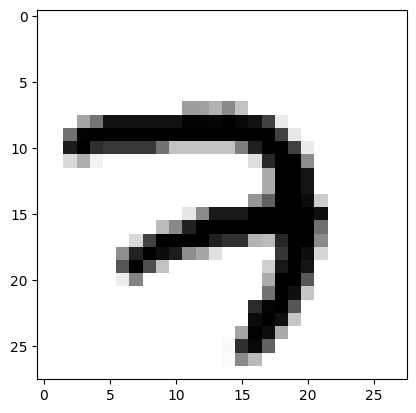

In [20]:
# let's view some data
plt.imshow(X_train[0],cmap="binary")
plt.show()

<Axes: >

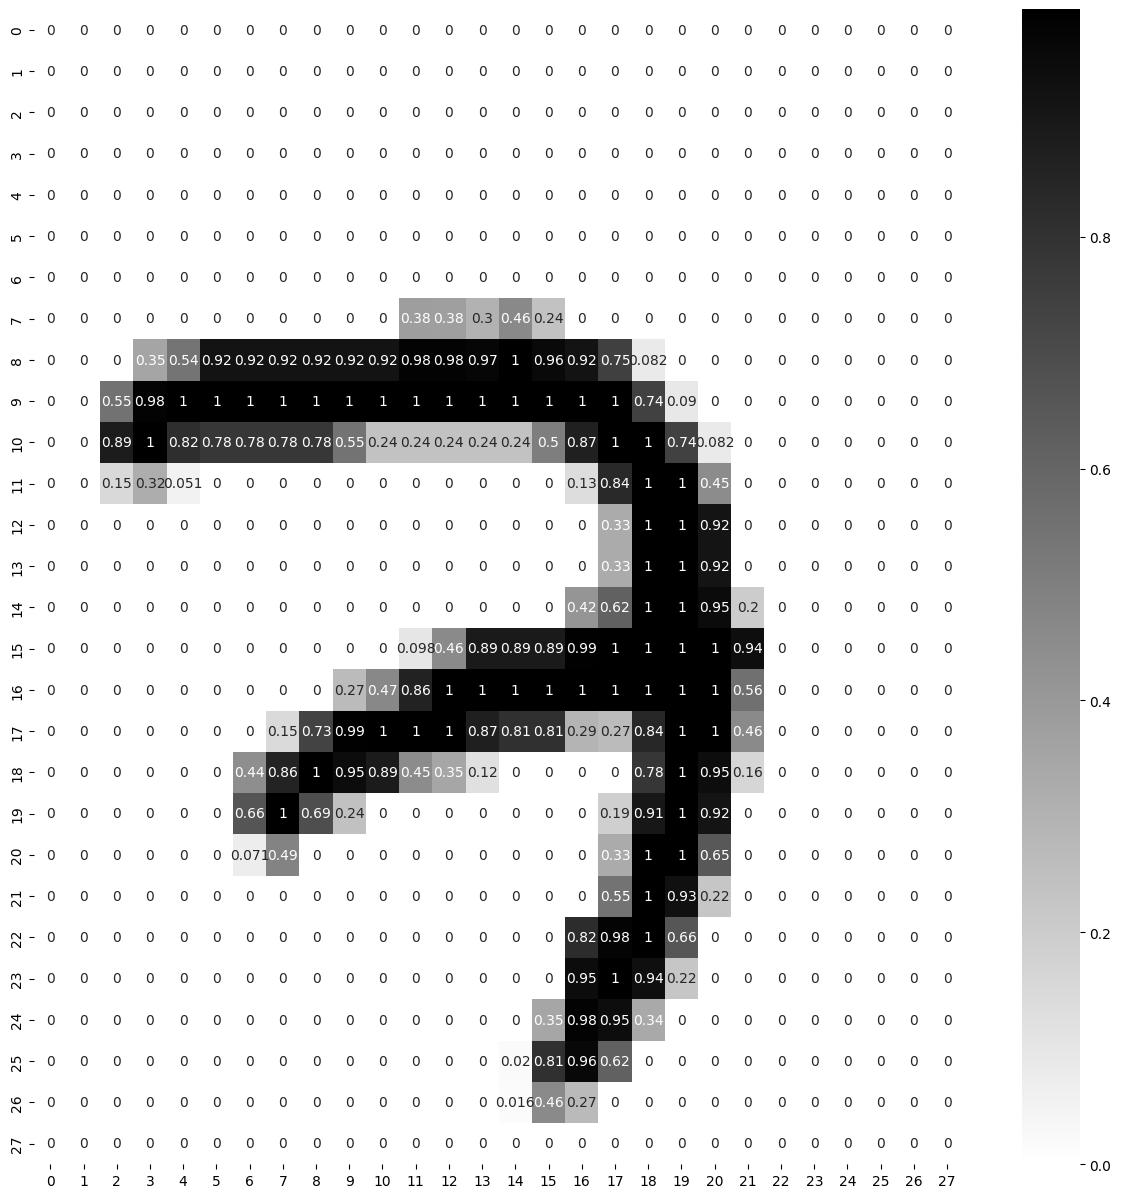

In [21]:
# By using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

## Architecture used in ANN

In [22]:
# creating layer of ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
        tf.keras.layers.Dense(10,activation="Softmax",name="outputLayer")]

In [23]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [24]:
model_clf.layers

In [25]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
hidden1=model_clf.layers[1]

In [27]:
hidden1.name

'hiddenLayer1'

In [28]:
hidden1.get_weights()[0].shape

(784, 300)

In [29]:
hidden1.get_weights()[1].shape

(300,)

In [30]:
weights,biases=hidden1.get_weights()

In [31]:
weights.shape

(784, 300)

In [32]:
biases.shape

(300,)

In [33]:
weights

array([[-0.00862022,  0.04324909,  0.04167935, ..., -0.03204382,
        -0.01873942,  0.00317882],
       [ 0.03568097,  0.0174493 , -0.05891541, ..., -0.0175433 ,
         0.03750646,  0.02887132],
       [-0.03653253,  0.05499296, -0.04348749, ...,  0.04116567,
        -0.01586147, -0.0173357 ],
       ...,
       [-0.03253474,  0.06426875,  0.04854561, ..., -0.06747847,
        -0.05255359, -0.03643353],
       [ 0.06201304, -0.021797  , -0.06284571, ...,  0.05379178,
         0.03504203,  0.05570404],
       [ 0.05628842,  0.06534043,  0.05229792, ...,  0.04250208,
        -0.04297589, -0.01767088]], dtype=float32)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
LOSS_Function="sparse_categorical_crossentropy"
OPTIMIZER="SGD"

In [36]:
METRICS=["accuracy"]
model_clf.compile(loss=LOSS_Function,optimizer=OPTIMIZER,metrics=METRICS)

In [37]:
# training
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 10s 3ms/step - loss: 0.5966 - accuracy: 0.8446 - val_loss: 0.3024 - val_accuracy: 0.9172
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2807 - accuracy: 0.9204 - val_loss: 0.2388 - val_accuracy: 0.9300
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2299 - accuracy: 0.9347 - val_loss: 0.1967 - val_accuracy: 0.9452
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1956 - accuracy: 0.9443 - val_loss: 0.1721 - val_accuracy: 0.9522
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1704 - accuracy: 0.9516 - val_loss: 0.1532 - val_accuracy: 0.9590
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1503 - accuracy: 0.9572 - val_loss: 0.1385 - val_accuracy: 0.9626
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1346 - accuracy: 0.9615 - val_loss: 0.1276 - val_accuracy

<Axes: >

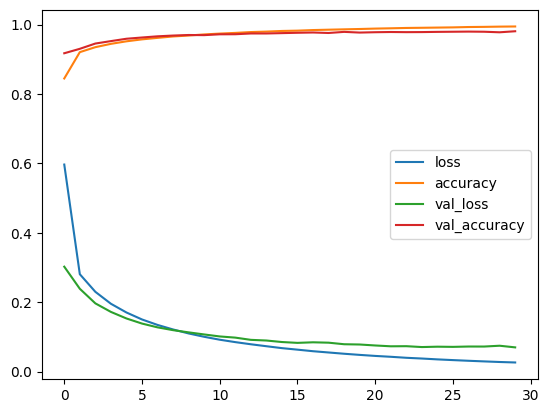

In [38]:
history.params
pd.DataFrame(history.history)
pd.DataFrame(history.history).plot()

In [39]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9782


[0.06973010301589966, 0.9782000184059143]

In [40]:
# SAMPLE check test data
X_new=X_test[:3]
actual=y_test[:3]

In [41]:
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

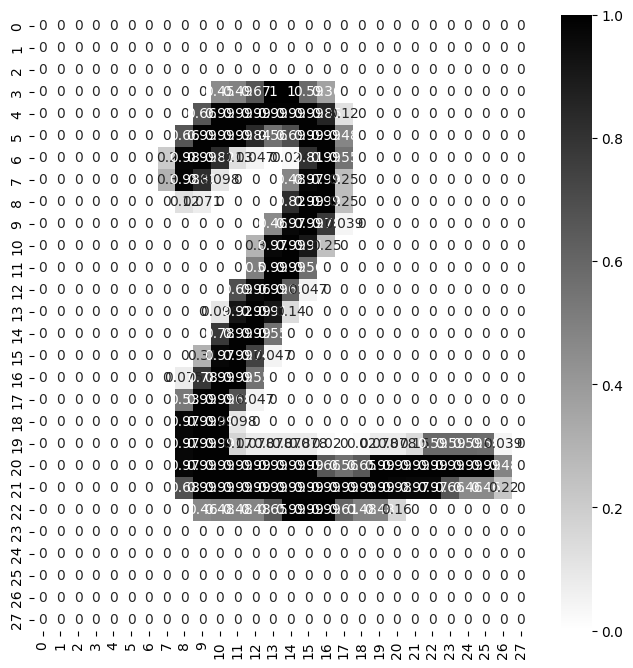

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[1],annot=True,cmap="binary")

In [44]:
y_prob=model_clf.predict(X_new)
y_prob.round(2)
y_prob

1/1 [==============================] - 0s 76ms/step


array([[2.7403982e-07, 7.5322227e-08, 3.3957691e-05, 7.2987581e-04,
        2.5952074e-09, 4.8242161e-09, 1.2302605e-12, 9.9922836e-01,
        1.9189674e-06, 5.5620544e-06],
       [3.0278851e-08, 3.0526040e-05, 9.9990106e-01, 5.6359117e-05,
        9.5361426e-15, 3.4534516e-08, 5.9085448e-08, 8.2375226e-12,
        1.1916267e-05, 3.2776118e-15],
       [1.2873248e-06, 9.9747223e-01, 1.2142030e-04, 3.1676314e-05,
        3.9821831e-04, 4.5346778e-06, 3.5318244e-05, 1.7002489e-03,
        2.3344546e-04, 1.4677588e-06]], dtype=float32)

In [45]:
y_pred=np.argmax(y_prob,axis=1)
y_pred


array([7, 2, 1])

In [46]:
actual

array([7, 2, 1], dtype=uint8)

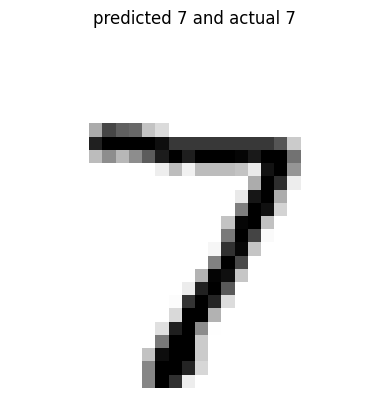

#####


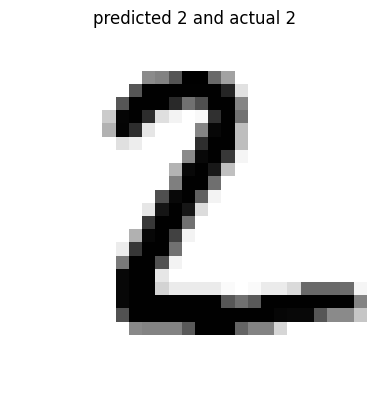

#####


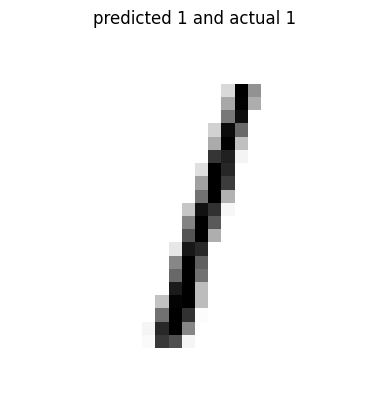

#####


In [47]:
# plot
for data,pred,actual_data in zip(X_new,y_pred,actual):
  plt.imshow(data,cmap="binary")
  plt.title(f"predicted {pred} and actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("#####")